In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/19000-spotify-songs/song_data.csv
/kaggle/input/19000-spotify-songs/song_info.csv


In [2]:
song_data = pd.read_csv("../input/19000-spotify-songs/song_data.csv")
song_info = pd.read_csv("../input/19000-spotify-songs/song_info.csv")

print(song_data.head())
print(song_data.info())

print(song_info.head())
print(song_info.info())

                    song_name  song_popularity  song_duration_ms  \
0  Boulevard of Broken Dreams               73            262333   
1                  In The End               66            216933   
2           Seven Nation Army               76            231733   
3                  By The Way               74            216933   
4           How You Remind Me               56            223826   

   acousticness  danceability  energy  instrumentalness  key  liveness  \
0      0.005520         0.496   0.682          0.000029    8    0.0589   
1      0.010300         0.542   0.853          0.000000    3    0.1080   
2      0.008170         0.737   0.463          0.447000    0    0.2550   
3      0.026400         0.451   0.970          0.003550    0    0.1020   
4      0.000954         0.447   0.766          0.000000   10    0.1130   

   loudness  audio_mode  speechiness    tempo  time_signature  audio_valence  
0    -4.095           1       0.0294  167.060               4      

**Dataset contains 19.000 songs and has 15 features listed below:**
* duration_ms: The duration of the track in milliseconds.
* key: The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
* audio_mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
* time_signature: An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).
* acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
* danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
* energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale.
* instrumentalness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
* loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.
* speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music.Values below 0.33 most likely represent music and other non-speech-like tracks.
* audio_valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
* tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
* song_popularity: Song ratings of spotify audience.
* liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.

In [3]:
song_data.isnull().sum()

song_name           0
song_popularity     0
song_duration_ms    0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
dtype: int64

In [4]:
song_info.isnull().sum()

song_name      0
artist_name    0
album_names    0
playlist       0
dtype: int64

In [5]:
# Merge datasets
names = song_info['artist_name']
playlist = song_info['playlist']
album = song_info['album_names']

song_data = song_data.join(names)
song_data = song_data.join(playlist)
song_data = song_data.join(album)

merged_data = song_data

In [6]:
print(merged_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
 15  artist_name       18835 non-null  object 
 16  playlist          18835 non-null  object

**Variable Y preparation**

In [7]:
song_data["popularity"]= [ 1 if i>=66.5 else 0 for i in song_data.song_popularity ]
song_data["popularity"].value_counts()

0    13386
1     5449
Name: popularity, dtype: int64

# Categorical Features vs Popularity

In [8]:
# key vs popularity
song_data[["key","popularity"]].groupby(["key"], as_index = False).mean().sort_values(by="popularity",ascending = False)

,key,popularity
1,1,0.356285
6,6,0.321984
0,0,0.303850
5,5,0.300508
11,11,0.293750
8,8,0.292068
4,4,0.284853
10,10,0.280992
2,2,0.265889
9,9,0.253828


In [9]:
# audio_mode vs popularity
song_data[["audio_mode","popularity"]].groupby(["audio_mode"], as_index = False).mean().sort_values(by="popularity",ascending = False)

,audio_mode,popularity
0,0,0.296545
1,1,0.285014


In [10]:
# time_signature vs popularity
song_data[["time_signature","popularity"]].groupby(["time_signature"], as_index = False).mean().sort_values(by="popularity",ascending = False)

,time_signature,popularity
4,5,0.304721
3,4,0.292497
2,3,0.222798
1,1,0.178082
0,0,0.000000


# Visualizations

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

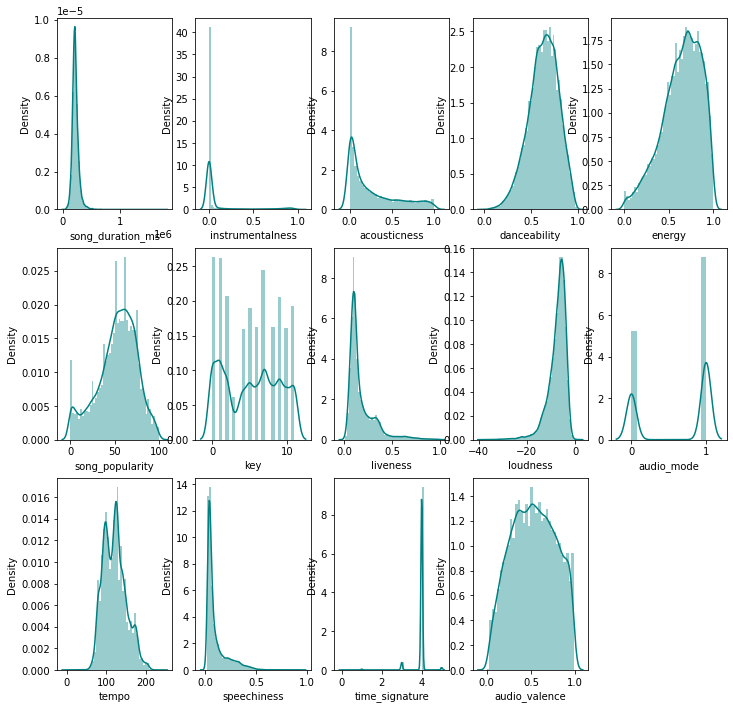

In [11]:
# Features distribution
f, axes = plt.subplots(3, 5, figsize=(12, 12))
sns.distplot( song_data["song_duration_ms"] , color="teal", ax=axes[0, 0])
sns.distplot( song_data["instrumentalness"] , color="teal", ax=axes[0, 1])
sns.distplot( song_data["acousticness"] , color="teal", ax=axes[0, 2])
sns.distplot( song_data["danceability"] , color="teal", ax=axes[0, 3])
sns.distplot( song_data["energy"] , color="teal", ax=axes[0, 4])
sns.distplot( song_data["song_popularity"] , color="teal", ax=axes[1, 0])
sns.distplot( song_data["key"] , color="teal", ax=axes[1, 1])
sns.distplot( song_data["liveness"] , color="teal", ax=axes[1, 2])
sns.distplot( song_data["loudness"] , color="teal", ax=axes[1, 3])
sns.distplot( song_data["audio_mode"] , color="teal", ax=axes[1, 4])
sns.distplot( song_data["tempo"] , color="teal", ax=axes[2, 0])
sns.distplot( song_data["speechiness"] , color="teal", ax=axes[2, 1])
sns.distplot( song_data["time_signature"] , color="teal", ax=axes[2, 2])
sns.distplot( song_data["audio_valence"] , color="teal", ax=axes[2, 3])
f.delaxes(axes[2][4])
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


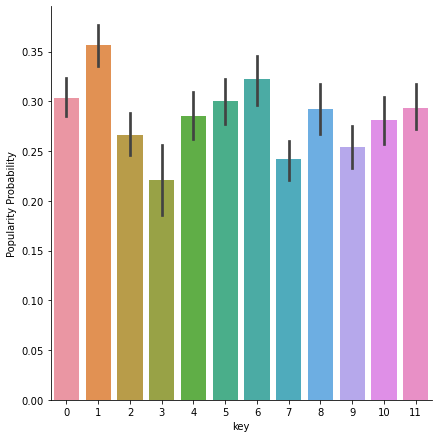

In [12]:
g = sns.factorplot(x = "key", y = "popularity", data = song_data, kind = "bar", size = 6)
g.set_ylabels("Popularity Probability")
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


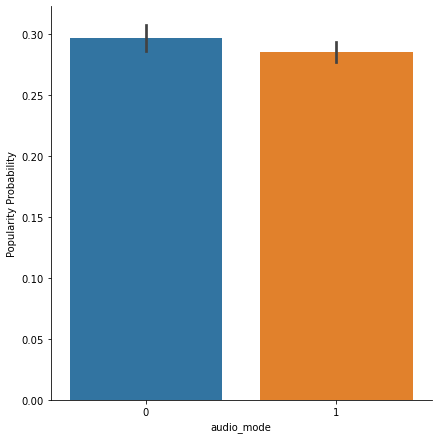

In [13]:
g = sns.factorplot(x = "audio_mode", y = "popularity", data = song_data, kind = "bar", size = 6)
g.set_ylabels("Popularity Probability")
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


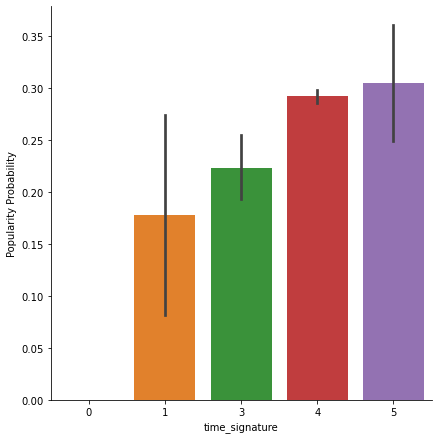

In [14]:
g = sns.factorplot(x = "time_signature", y = "popularity", data = song_data, kind = "bar", size = 6)
g.set_ylabels("Popularity Probability")
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


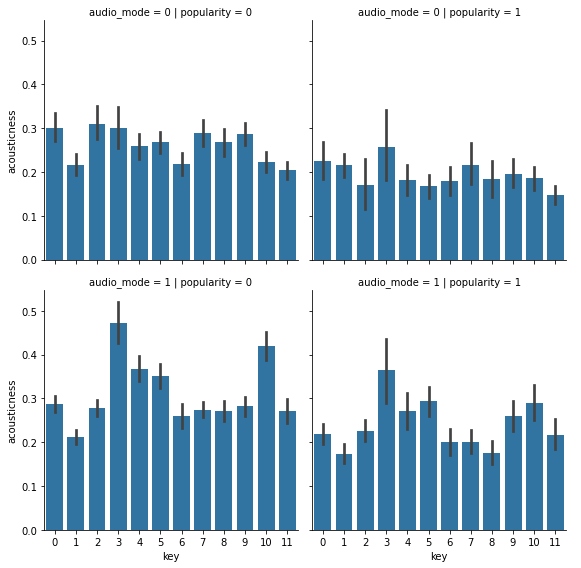

In [15]:
g = sns.FacetGrid(song_data, row = "audio_mode", col = "popularity", size = 4)
g.map(sns.barplot, "key", "acousticness")
g.add_legend()
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


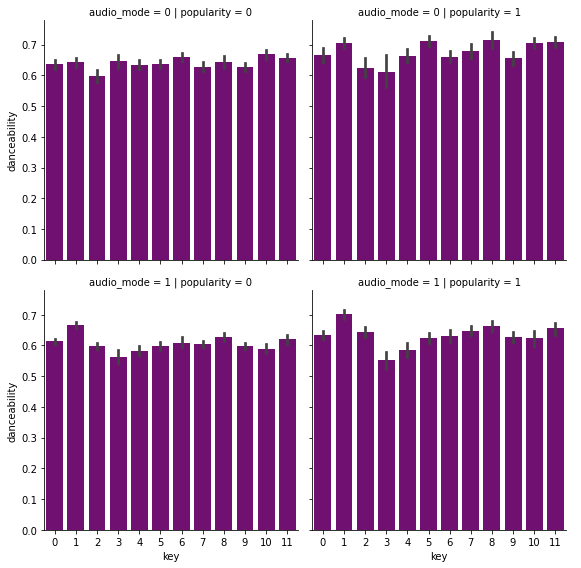

In [16]:
g = sns.FacetGrid(song_data, row = "audio_mode", col = "popularity", size = 4)
g.map(sns.barplot, "key", "danceability",color="purple")
g.add_legend()
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


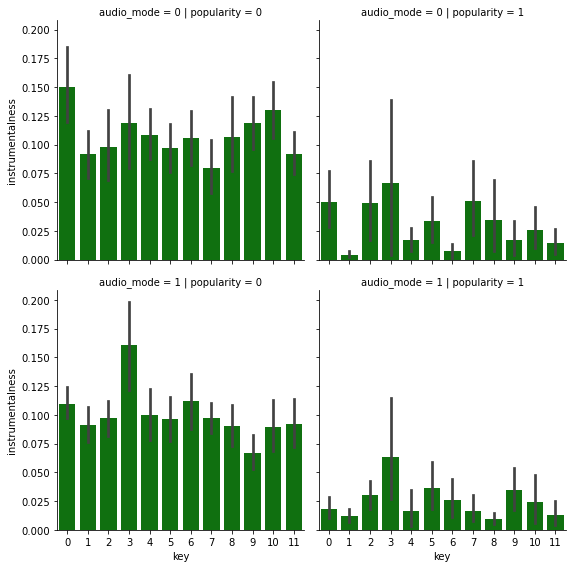

In [17]:
g = sns.FacetGrid(song_data, row = "audio_mode", col = "popularity", size = 4)
g.map(sns.barplot, "key", "instrumentalness",color="green")
g.add_legend()
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


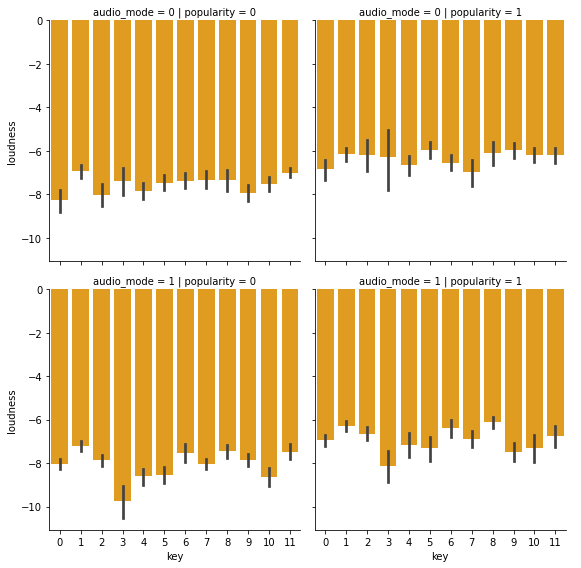

In [18]:
g = sns.FacetGrid(song_data, row = "audio_mode", col = "popularity", size = 4)
g.map(sns.barplot, "key", "loudness",color="orange")
g.add_legend()
plt.show()

# Correlation

In [19]:
# Correlation
song_data.corr()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,popularity
song_popularity,1.000000,-0.018899,-0.065181,0.104290,0.001365,-0.130907,-0.013160,-0.038937,0.099442,-0.004969,0.021479,-0.022672,0.034983,-0.052895,0.699048
song_duration_ms,-0.018899,1.000000,-0.097882,-0.104985,0.092688,-0.015188,-0.004615,0.016086,0.016469,-0.026328,-0.083447,0.012791,0.000264,-0.063421,0.003494
acousticness,-0.065181,-0.097882,1.000000,-0.182500,-0.662639,0.173098,-0.002025,-0.082537,-0.557744,0.064100,-0.093574,-0.136421,-0.157177,-0.121670,-0.106483
danceability,0.104290,-0.104985,-0.182500,1.000000,0.044373,-0.130483,0.007723,-0.090694,0.177639,-0.106539,0.213728,-0.121286,0.136391,0.332014,0.107519
energy,0.001365,0.092688,-0.662639,0.044373,1.000000,-0.205914,0.020416,0.167143,0.755516,-0.051605,0.062053,0.162448,0.146265,0.316742,0.040548
instrumentalness,-0.130907,-0.015188,0.173098,-0.130483,-0.205914,1.000000,-0.009463,-0.032887,-0.390248,-0.014983,-0.081138,-0.036934,-0.069181,-0.178570,-0.160144
key,-0.013160,-0.004615,-0.002025,0.007723,0.020416,-0.009463,1.000000,-0.008193,0.010452,-0.169848,0.033639,0.003239,-0.008282,0.025356,-0.030251
liveness,-0.038937,0.016086,-0.082537,-0.090694,0.167143,-0.032887,-0.008193,1.000000,0.102450,-0.001035,0.090845,0.031876,0.013289,0.013789,-0.023265
loudness,0.099442,0.016469,-0.557744,0.177639,0.755516,-0.390248,0.010452,0.102450,1.000000,-0.058506,0.078164,0.129938,0.119241,0.199696,0.137111
audio_mode,-0.004969,-0.026328,0.064100,-0.106539,-0.051605,-0.014983,-0.169848,-0.001035,-0.058506,1.000000,-0.111627,0.020448,-0.024042,-0.004558,-0.012290


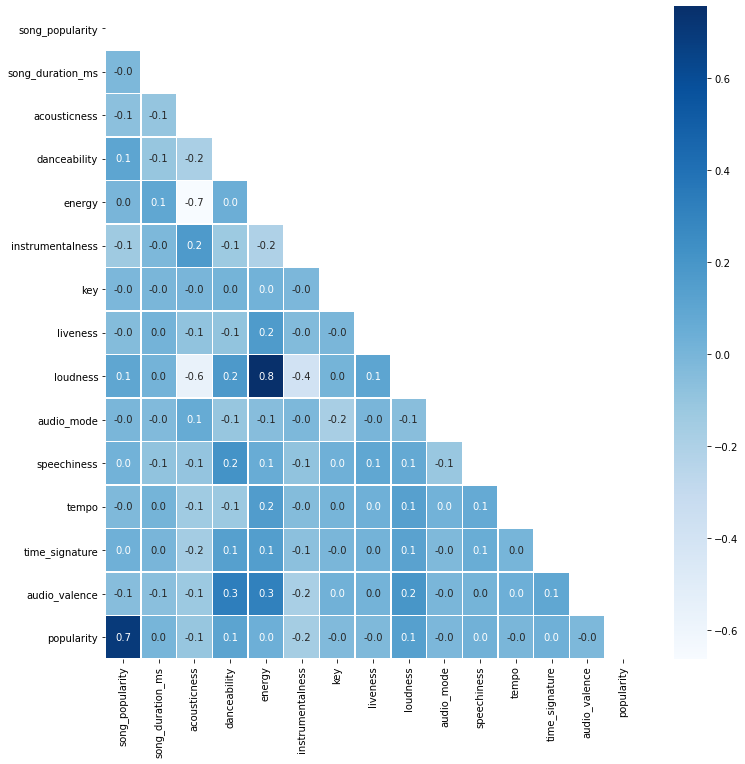

In [20]:
f,ax = plt.subplots(figsize=(12, 12))
mask = np.zeros_like(song_data.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(song_data.corr(), annot=True, linewidths=0.4,linecolor="white", fmt= '.1f',ax=ax,cmap="Blues",mask=mask)
plt.show() 

<AxesSubplot:xlabel='energy', ylabel='loudness'>

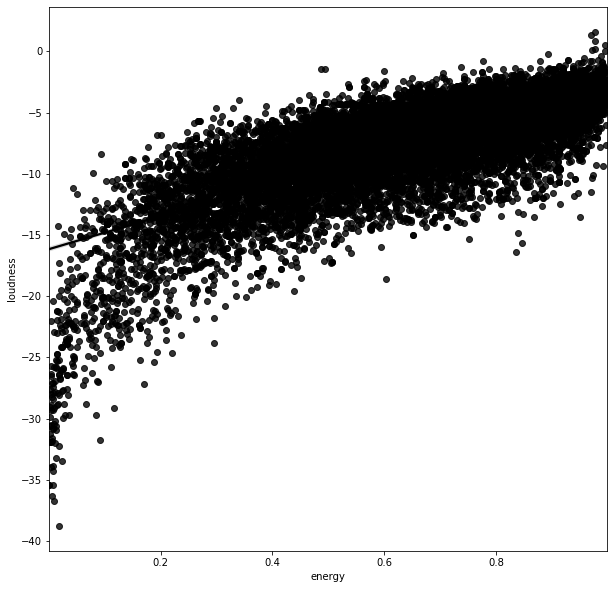

In [21]:
# Analysing the relationship between energy and loudness
fig=plt.subplots(figsize=(10,10))
sns.regplot(x='energy',y='loudness',data=song_data,color='black')

In [22]:
song_data = song_data.drop(['energy'],axis=1)

In [23]:
numeric_columns = song_data.columns[song_data.dtypes != 'object']
string_columns = song_data.columns[song_data.dtypes == 'object']
print(f'There are {len(numeric_columns)} numeric columns & {len(string_columns)} string columns')

There are 14 numeric columns & 4 string columns


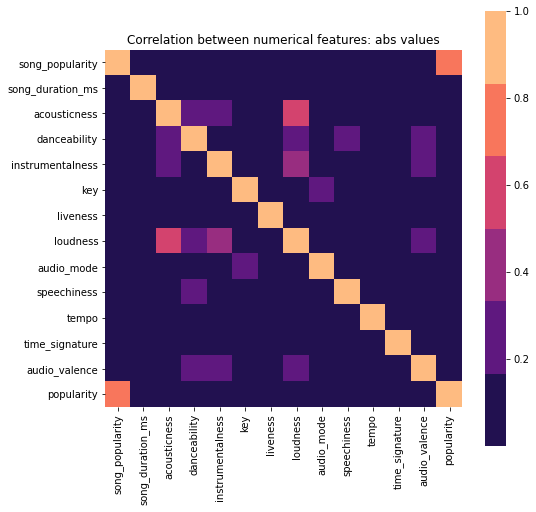

In [24]:
numeric_df = pd.DataFrame(data=song_data, columns=numeric_columns, index=song_data.index)
corr = np.abs(numeric_df.corr())
fig, ax = plt.subplots(figsize=(8, 8))
cmap = sns.color_palette("magma")
sns.heatmap(corr, cmap=cmap, square=True)
plt.title('Correlation between numerical features: abs values')
plt.show()

# Outlier Detection

In [25]:
print(song_data.shape)

(18835, 18)


In [26]:
from collections import Counter
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index #filtre
        # store indeces
        outlier_indices.extend(outlier_list_col) #The extend() extends the list by adding all items of a list (passed as an argument) to the end.
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2) 
    
    return multiple_outliers

In [27]:
song_data.loc[detect_outliers(song_data,["song_popularity",
                                         "song_duration_ms",
                                         "danceability",
                                         "instrumentalness",
                                         "liveness",
                                         "loudness",
                                         "speechiness",
                                         "audio_valence"])]

,song_name,song_popularity,song_duration_ms,acousticness,danceability,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,artist_name,playlist,album_names,popularity
232,La Maza,58,351400,0.6520,0.555,0.000012,9,0.235,-17.718,0,0.2700,170.603,3,0.437,Silvio Rodríguez,50 Latin Classics,Cuba Classics 1: Silvio Rodriguez,0
253,Whole Lotta Love,77,333893,0.0484,0.412,0.131000,9,0.405,-11.600,1,0.4050,89.740,4,0.422,Led Zeppelin,60s Rock Anthems,Led Zeppelin II,1
501,Do You Feel Like We Do,48,836666,0.0439,0.295,0.011700,0,0.977,-8.232,1,0.0284,98.284,4,0.384,Peter Frampton,70s Rock Anthems,Shine On - A Collection,0
981,The Times They Are A-Changin' - Live at Sony M...,49,348560,0.6300,0.393,0.007910,9,0.986,-13.243,1,0.0401,163.604,3,0.512,Bob Dylan,90s Acoustic,Mtv Unplugged,0
1113,November Rain,38,537506,0.0165,0.197,0.279000,11,0.125,-9.291,1,0.0300,79.495,4,0.221,Guns N' Roses,90s Rock Anthems,Use Your Illusion I,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15247,I Know You So Well,8,102661,0.9230,0.679,0.721000,0,0.813,-16.557,0,0.1050,60.724,4,0.304,Xfruge,Sad Vibe,I Know You So Well,0
16642,same stars,46,116918,0.2510,0.687,0.862000,0,0.496,-19.504,1,0.0378,115.996,4,0.159,fcj,Tender,if you're reading this ily,0
17723,Dutch Spring,0,205623,0.1960,0.510,0.135000,6,0.569,-4.958,0,0.3910,83.355,4,0.832,Sampa the Great,Urban Poet,The Great Mixtape,0
3720,Racism And Injustice,21,260160,0.9220,0.650,0.000000,9,0.739,-18.244,0,0.9400,117.198,4,0.306,"Martin Luther King, Jr.",Black History Salute,Civil Rights Leader,0


In [28]:
# drop outliers
song_data = song_data.drop(detect_outliers(song_data,["song_popularity",
                                                      "song_duration_ms",
                                                      "danceability",
                                                      "instrumentalness",
                                                      "liveness",
                                                      "loudness",
                                                      "speechiness",
                                                      "audio_valence"]),
                           axis = 0).reset_index(drop = True)

In [29]:
print(song_data.shape)

(18617, 18)


In [30]:
song_data.duplicated().sum()

0

In [31]:
song_data = song_data[~song_data.duplicated()==1]

In [32]:
print(song_data.head())

                    song_name  song_popularity  song_duration_ms  \
0  Boulevard of Broken Dreams               73            262333   
1                  In The End               66            216933   
2           Seven Nation Army               76            231733   
3                  By The Way               74            216933   
4           How You Remind Me               56            223826   

   acousticness  danceability  instrumentalness  key  liveness  loudness  \
0      0.005520         0.496          0.000029    8    0.0589    -4.095   
1      0.010300         0.542          0.000000    3    0.1080    -6.407   
2      0.008170         0.737          0.447000    0    0.2550    -7.828   
3      0.026400         0.451          0.003550    0    0.1020    -4.938   
4      0.000954         0.447          0.000000   10    0.1130    -5.065   

   audio_mode  speechiness    tempo  time_signature  audio_valence  \
0           1       0.0294  167.060               4          0.4

# Analysis
****

In [33]:
song_data['artist_name'].nunique()

7439

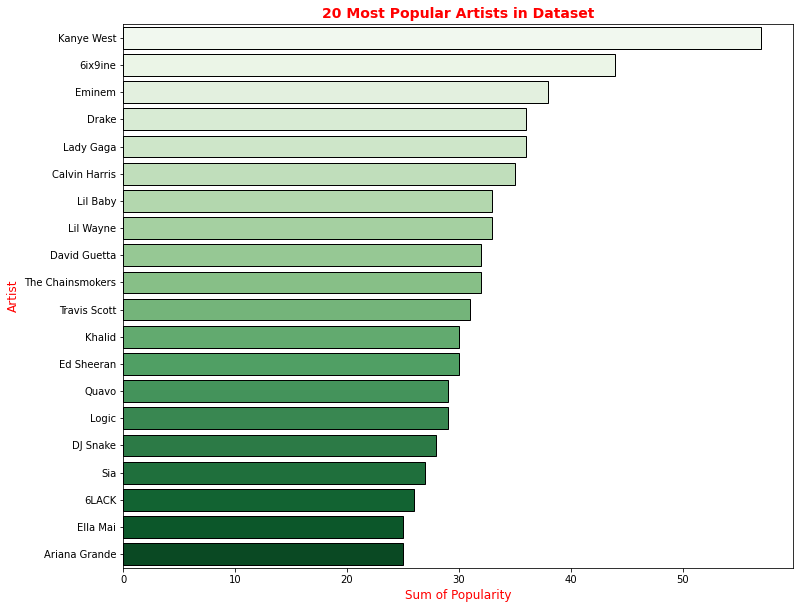

In [34]:
# # Plotting
fig, ax = plt.subplots(figsize = (12, 10))
lead_artists = song_data.groupby('artist_name')['popularity'].sum().sort_values(ascending=False).head(20)
ax = sns.barplot(x=lead_artists.values, y=lead_artists.index, palette="Greens", orient="h", edgecolor='black', ax=ax)
ax.set_xlabel('Sum of Popularity', c='r', fontsize=12)
ax.set_ylabel('Artist', c='r', fontsize=12)
ax.set_title('20 Most Popular Artists in Dataset', c='r', fontsize=14, weight = 'bold')
plt.show()

In [35]:
print(song_data['artist_name'].value_counts())

Lady Gaga        78
Kanye West       78
Drake            68
Khalid           60
Eminem           45
                 ..
Iman Magnetic     1
Skizzy Mars       1
Aya Nakamura      1
Jake Shears       1
Piero             1
Name: artist_name, Length: 7439, dtype: int64


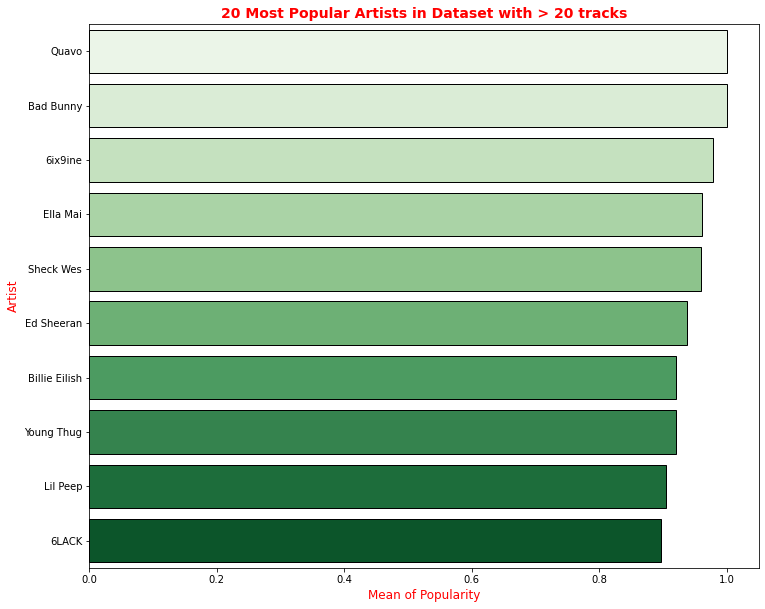

In [36]:
# Find out artists with more than 20 tracks
song_data['popular_artist'] = song_data['artist_name'].map(song_data['artist_name'].value_counts()>20)
pop_arts  = song_data.groupby(['artist_name', 'popular_artist'])['popularity'].mean().sort_values(ascending=False).reset_index(1)
df_pop_arts = pop_arts.loc[pop_arts['popular_artist'] == True,['popularity']]

# # Plotting
fig, ax = plt.subplots(figsize = (12, 10))
lead_artists = df_pop_arts.groupby('artist_name')['popularity'].mean().sort_values(ascending=False).head(10)
ax = sns.barplot(x=lead_artists.values, y=lead_artists.index, palette="Greens", orient="h", edgecolor='black', ax=ax)
ax.set_xlabel('Mean of Popularity', c='r', fontsize=12)
ax.set_ylabel('Artist', c='r', fontsize=12)
ax.set_title('20 Most Popular Artists in Dataset with > 20 tracks', c='r', fontsize=14, weight = 'bold')
plt.show()

**Happy or sad songs? Which ones do we tend to like more?**

In [37]:
song_data["mood"]= [ "Happy" if i>=0.5 else "Sad" for i in song_data.audio_valence ]
song_data["mood"].value_counts()

Happy    10055
Sad       8562
Name: mood, dtype: int64

In [38]:
print(song_data.head())

                    song_name  song_popularity  song_duration_ms  \
0  Boulevard of Broken Dreams               73            262333   
1                  In The End               66            216933   
2           Seven Nation Army               76            231733   
3                  By The Way               74            216933   
4           How You Remind Me               56            223826   

   acousticness  danceability  instrumentalness  key  liveness  loudness  \
0      0.005520         0.496          0.000029    8    0.0589    -4.095   
1      0.010300         0.542          0.000000    3    0.1080    -6.407   
2      0.008170         0.737          0.447000    0    0.2550    -7.828   
3      0.026400         0.451          0.003550    0    0.1020    -4.938   
4      0.000954         0.447          0.000000   10    0.1130    -5.065   

   audio_mode  speechiness    tempo  time_signature  audio_valence  \
0           1       0.0294  167.060               4          0.4

In [39]:
# Filtering for just popular songs' data
popular_songs = song_data[song_data["popularity"] == 1]
print(popular_songs.describe())

       song_popularity  song_duration_ms  acousticness  danceability  \
count      5436.000000       5436.000000   5436.000000   5436.000000   
mean         77.005335     218523.818065      0.209295      0.660239   
std           8.072200      48246.048091      0.244620      0.147026   
min          67.000000      93840.000000      0.000009      0.149000   
25%          71.000000     190222.750000      0.026275      0.563000   
50%          75.000000     212434.000000      0.106000      0.668500   
75%          82.000000     240440.000000      0.300000      0.765000   
max         100.000000     547733.000000      0.995000      0.978000   

       instrumentalness          key     liveness     loudness   audio_mode  \
count       5436.000000  5436.000000  5436.000000  5436.000000  5436.000000   
mean           0.021156     5.116262     0.173991    -6.601421     0.618469   
std            0.110942     3.658327     0.136741     3.063720     0.485807   
min            0.000000     0.00000

In [40]:
popular_songs["mood"] = ["Happy" if i>=0.5 else "Sad" for i in popular_songs.audio_valence]
popular_songs["mood"].value_counts()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Happy    2845
Sad      2591
Name: mood, dtype: int64

In [41]:
top_list = popular_songs[popular_songs["song_popularity"] > 90]
print(top_list.head())

                                         song_name  song_popularity  \
60                               MIA (feat. Drake)               94   
61  Taki Taki (with Selena Gomez, Ozuna & Cardi B)               98   
64                Beautiful (feat. Camila Cabello)               94   
70                              Wake Up in the Sky               92   
85                                            BEBE               95   

    song_duration_ms  acousticness  danceability  instrumentalness  key  \
60            210367       0.01430         0.818          0.000512    6   
61            212500       0.15300         0.841          0.000003    1   
64            180000       0.34600         0.638          0.000000    2   
70            204664       0.00381         0.800          0.000000    4   
85            217822       0.17200         0.635          0.000000    0   

    liveness  loudness  audio_mode  speechiness    tempo  time_signature  \
60    0.0990    -6.350           0       0.054

In [42]:
top_list["mood"] = [ "Happy" if i>=0.5 else "Sad" for i in top_list.audio_valence ]
top_list["mood"].value_counts()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Sad      332
Happy    167
Name: mood, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


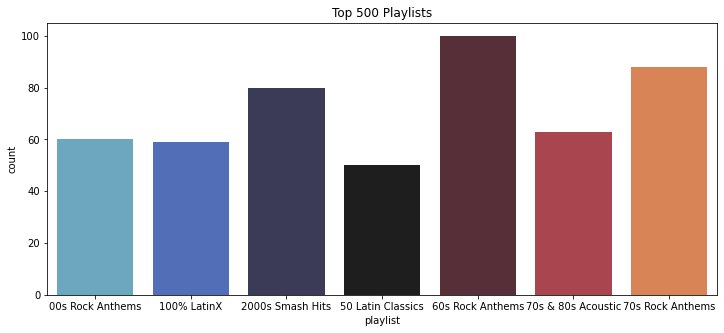

In [43]:
# Top 500 Playlists Gender
plt.figure(figsize=(12,5))
new_data= song_info['playlist'].head(500)
g = sns.countplot(new_data, palette="icefire")
plt.title("Top 500 Playlists")
plt.show()

# Feature Engineering

In [44]:
song_data["popularity"]= [ 1 if i>=66.5 else 0 for i in song_data.song_popularity ]
song_data["popularity"].value_counts()

0    13181
1     5436
Name: popularity, dtype: int64

In [45]:
song_data.isnull().sum()

song_name           0
song_popularity     0
song_duration_ms    0
acousticness        0
danceability        0
instrumentalness    0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
artist_name         0
playlist            0
album_names         0
popularity          0
popular_artist      0
mood                0
dtype: int64

# Categorical variables into dummies

In [46]:
song_data["time_signature"] = song_data["time_signature"].astype("category")
song_data = pd.get_dummies(song_data, columns=["time_signature"])

In [47]:
from sklearn import preprocessing
label_en=preprocessing.LabelEncoder()

song_data['playlist']=label_en.fit_transform(song_data['playlist'])
song_data['artist_name']=label_en.fit_transform(song_data['artist_name'])
song_data['album_names']=label_en.fit_transform(song_data['album_names'])
song_data['popular_artist']=label_en.fit_transform(song_data['popular_artist'])


In [48]:
print(song_data.head())

                    song_name  song_popularity  song_duration_ms  \
0  Boulevard of Broken Dreams               73            262333   
1                  In The End               66            216933   
2           Seven Nation Army               76            231733   
3                  By The Way               74            216933   
4           How You Remind Me               56            223826   

   acousticness  danceability  instrumentalness  key  liveness  loudness  \
0      0.005520         0.496          0.000029    8    0.0589    -4.095   
1      0.010300         0.542          0.000000    3    0.1080    -6.407   
2      0.008170         0.737          0.447000    0    0.2550    -7.828   
3      0.026400         0.451          0.003550    0    0.1020    -4.938   
4      0.000954         0.447          0.000000   10    0.1130    -5.065   

   audio_mode  ...  playlist  album_names  popularity  popular_artist   mood  \
0           1  ...         0         4070           1 

In [49]:
song_data.drop(["song_popularity", "song_name", "mood"],axis=1,inplace=True)  #highly correlated with audio_valance

In [50]:
print(song_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18617 entries, 0 to 18616
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_duration_ms  18617 non-null  int64  
 1   acousticness      18617 non-null  float64
 2   danceability      18617 non-null  float64
 3   instrumentalness  18617 non-null  float64
 4   key               18617 non-null  int64  
 5   liveness          18617 non-null  float64
 6   loudness          18617 non-null  float64
 7   audio_mode        18617 non-null  int64  
 8   speechiness       18617 non-null  float64
 9   tempo             18617 non-null  float64
 10  audio_valence     18617 non-null  float64
 11  artist_name       18617 non-null  int64  
 12  playlist          18617 non-null  int64  
 13  album_names       18617 non-null  int64  
 14  popularity        18617 non-null  int64  
 15  popular_artist    18617 non-null  int64  
 16  time_signature_0  18617 non-null  uint8 

In [51]:
def change_type(var):
    song_data[var] = song_data[var].astype(int)

In [52]:
column= ["time_signature_0","time_signature_1","time_signature_3","time_signature_4","time_signature_5"]

for i in column:
    change_type(i)

In [53]:
print(song_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18617 entries, 0 to 18616
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_duration_ms  18617 non-null  int64  
 1   acousticness      18617 non-null  float64
 2   danceability      18617 non-null  float64
 3   instrumentalness  18617 non-null  float64
 4   key               18617 non-null  int64  
 5   liveness          18617 non-null  float64
 6   loudness          18617 non-null  float64
 7   audio_mode        18617 non-null  int64  
 8   speechiness       18617 non-null  float64
 9   tempo             18617 non-null  float64
 10  audio_valence     18617 non-null  float64
 11  artist_name       18617 non-null  int64  
 12  playlist          18617 non-null  int64  
 13  album_names       18617 non-null  int64  
 14  popularity        18617 non-null  int64  
 15  popular_artist    18617 non-null  int64  
 16  time_signature_0  18617 non-null  int64 

In [54]:
print(song_data.head())

   song_duration_ms  acousticness  danceability  instrumentalness  key  \
0            262333      0.005520         0.496          0.000029    8   
1            216933      0.010300         0.542          0.000000    3   
2            231733      0.008170         0.737          0.447000    0   
3            216933      0.026400         0.451          0.003550    0   
4            223826      0.000954         0.447          0.000000   10   

   liveness  loudness  audio_mode  speechiness    tempo  ...  artist_name  \
0    0.0589    -4.095           1       0.0294  167.060  ...         2462   
1    0.1080    -6.407           0       0.0498  105.256  ...         3763   
2    0.2550    -7.828           1       0.0792  123.881  ...         6621   
3    0.1020    -4.938           1       0.1070  122.444  ...         5271   
4    0.1130    -5.065           1       0.0313  172.011  ...         4636   

   playlist  album_names  popularity  popular_artist  time_signature_0  \
0         0       

In [55]:
# Data preparation
y = song_data["popularity"].values
x = song_data.drop(["popularity"],axis=1)

In [56]:
# Normalization
x_norm = (x - np.min(x))/(np.max(x)-np.min(x)).values


In [57]:
print(x_norm.head())

   song_duration_ms  acousticness  danceability  instrumentalness       key  \
0          0.133179      0.005541      0.469361          0.000030  0.727273   
1          0.107575      0.010340      0.519075          0.000000  0.272727   
2          0.115921      0.008202      0.729817          0.451972  0.000000   
3          0.107575      0.026505      0.420728          0.003589  0.000000   
4          0.111462      0.000957      0.416405          0.000000  0.909091   

   liveness  loudness  audio_mode  speechiness     tempo  audio_valence  \
0  0.049327  0.851751         1.0     0.007662  0.615495       0.469303   
1  0.099784  0.791408         0.0     0.029991  0.299729       0.361082   
2  0.250848  0.754320         1.0     0.062172  0.394887       0.313215   
3  0.093618  0.829749         1.0     0.092601  0.387545       0.182102   
4  0.104922  0.826434         1.0     0.009742  0.640790       0.573361   

   artist_name  playlist  album_names  popular_artist  time_signature_0  \

In [58]:
# Train test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

x_train = x_train.T
x_test = x_test.T
y_train = y_train.astype(int).T
y_test = y_test.astype(int).T

print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

x_train:  (20, 14893)
x_test:  (20, 3724)
y_train:  (14893,)
y_test:  (3724,)


**kNN**

In [59]:
# KNN prediction
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)

x,y = song_data.loc[:,song_data.columns != 'popularity'], song_data.loc[:,'popularity']

y=y.astype(int)

In [60]:
knn.fit(x,y)

prediction = knn.predict(x)

print('Prediction: {}'.format(prediction))

Prediction: [0 0 1 ... 0 0 0]


In [61]:
x_train = x_train.T
x_test = x_test.T
y_train = y_train.astype(int).T
y_test = y_test.astype(int).T

In [62]:
#KNN Test
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print('With KNN (K=3) train accuracy is: ',knn.score(x_train,y_train))
print('With KNN (K=3) test accuracy is: ',knn.score(x_test,y_test))


With KNN (K=3) train accuracy is:  0.9999328543611092
With KNN (K=3) test accuracy is:  0.7945757250268528


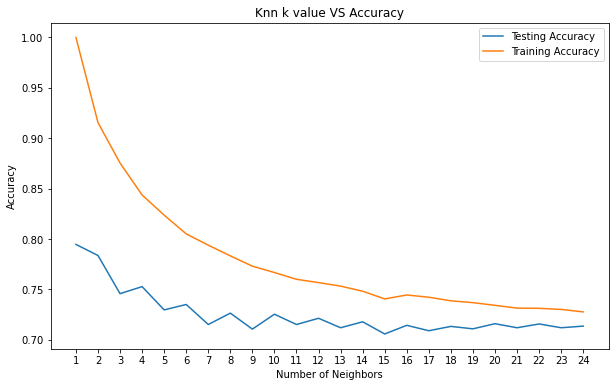

Best accuracy is 0.7945757250268528 with K = 1


In [63]:
neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []

for i, k in enumerate(neig):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    train_accuracy.append(knn.score(x_train, y_train))
    test_accuracy.append(knn.score(x_test, y_test))

plt.figure(figsize=[10,6])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('Knn k value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

In [64]:
from sklearn.model_selection import cross_val_score
k = 10
cv_result = cross_val_score(knn,x_train,y_train,cv=k)  
cv_result_knn=np.sum(cv_result)/k
print('Cross_val Scores: ',cv_result)
print('Cross_val scores average: ',np.sum(cv_result)/k)

Cross_val Scores:  [0.69932886 0.70805369 0.71275168 0.70517126 0.70584285 0.70920081
 0.72061786 0.71054399 0.70785762 0.70248489]
Cross_val scores average:  0.7081853502868913


In [65]:
from sklearn.model_selection import GridSearchCV
grid = {'n_neighbors': np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, grid, cv=3) 
knn_cv.fit(x,y)
print("Tuned hyperparameter k: {}".format(knn_cv.best_params_)) 
print("Best accuracy: {}".format(knn_cv.best_score_))

Tuned hyperparameter k: {'n_neighbors': 2}
Best accuracy: 0.7747227973518042


In [66]:
KKN_Score= max(test_accuracy)
CrossVal_KNN_Score=cv_result_knn

print(CrossVal_KNN_Score)

0.7081853502868913


# Recommendation Engine

In [67]:
from scipy.spatial import distance

In [68]:
# This is a function to find the closest song name from the list
def find_word(word,words):
    t=[]
    count=0
    if word[-1]==' ':
        word=word[:-1]
    for i in words:
        if word.lower() in i.lower():
            t.append([len(word)/len(i),count])
        else:
            t.append([0,count])
        count+=1
    t.sort(reverse=True)
    return words[t[0][1]]
        

In [69]:
merged_data = merged_data.drop(columns=['artist_name', 'album_names'])

In [70]:
print(merged_data.head())

                    song_name  song_popularity  song_duration_ms  \
0  Boulevard of Broken Dreams               73            262333   
1                  In The End               66            216933   
2           Seven Nation Army               76            231733   
3                  By The Way               74            216933   
4           How You Remind Me               56            223826   

   acousticness  danceability  energy  instrumentalness  key  liveness  \
0      0.005520         0.496   0.682          0.000029    8    0.0589   
1      0.010300         0.542   0.853          0.000000    3    0.1080   
2      0.008170         0.737   0.463          0.447000    0    0.2550   
3      0.026400         0.451   0.970          0.003550    0    0.1020   
4      0.000954         0.447   0.766          0.000000   10    0.1130   

   loudness  audio_mode  speechiness    tempo  time_signature  audio_valence  \
0    -4.095           1       0.0294  167.060               4     

In [71]:
# Making a weight matrix using euclidean distance
def make_matrix(data,song,number):
    df=pd.DataFrame()
    data.drop_duplicates(inplace=True)
    songs=data['song_name'].values
#    best = difflib.get_close_matches(song,songs,1)[0]
    best=find_word(song,songs)
    print('The song closest to your search is :',best)
    genre=data[data['song_name']==best]['playlist'].values[0]
    df=data[data['playlist']==playlist]
    x=df[df['song_name']==best].drop(columns=['playlist','song_name']).values
    if len(x)>1:
        x=x[1]
    song_names=df['song_name'].values
    df.drop(columns=['playlist','song_name'],inplace=True)
    df=df.fillna(df.mean())
    p=[]
    count=0
    for i in df.values:
        p.append([distance.euclidean(x,i),count])
        count+=1
    p.sort()
    for i in range(1,number+1):
        print(song_names[p[i][1]])
    

In [75]:
print(song_data.head(15))

    song_duration_ms  acousticness  danceability  instrumentalness  key  \
0             262333      0.005520         0.496          0.000029    8   
1             216933      0.010300         0.542          0.000000    3   
2             231733      0.008170         0.737          0.447000    0   
3             216933      0.026400         0.451          0.003550    0   
4             223826      0.000954         0.447          0.000000   10   
5             235893      0.008950         0.316          0.000002    4   
6             199893      0.000504         0.581          0.001110    4   
7             213800      0.001480         0.613          0.000582    2   
8             222586      0.001080         0.330          0.000000    1   
9             203346      0.001720         0.542          0.010400    9   
10            168253      0.042400         0.629          0.000000    2   
11            185586      0.004600         0.496          0.000000    9   
12            209266     

In [72]:
a=input('Please enter The name of the song :')
b=int(input('Please enter the number of recommendations you want: '))
make_matrix(merged_data,a,b)

Please enter The name of the song :Numb
Please enter the number of recommendations you want: 3
The song closest to your search is : Numb
World on Fire
The Come Down Was Real
SS


In [73]:
def make_matrix_cosine(data,song,number):
    df=pd.DataFrame()
    data.drop_duplicates(inplace=True)
    songs=data['song_name'].values
#    best = difflib.get_close_matches(song,songs,1)[0]
    best=find_word(song,songs)
    print('The song closest to your search is :',best)
    genre=data[data['song_name']==best]['playlist'].values[0]
    df=data[data['playlist']==playlist]
    x=df[df['song_name']==best].drop(columns=['playlist','song_name']).values
    if len(x)>1:
        x=x[1]
    song_names=df['song_name'].values
    df.drop(columns=['playlist','song_name'],inplace=True)
    df=df.fillna(df.mean())
    p=[]
    count=0
    for i in df.values:
        p.append([distance.cosine(x,i),count])
        count+=1
    p.sort()
    for i in range(1,number+1):
        print(song_names[p[i][1]])

In [74]:
c=input('Please enter The name of the song :')
d=int(input('Please enter the number of recommendations you want: '))
make_matrix_cosine(merged_data,c,d)

Please enter The name of the song :Numb
Please enter the number of recommendations you want: 4
The song closest to your search is : Numb
The Final Countdown
Poker Face
We Didn't Start the Fire
Fantasy
